# Proyecto Final - Análisis de Acciones e Ingresos: Tesla y GameStop

## Pregunta 1 - Extracción de datos de acciones de Tesla (2 puntos)

In [ ]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Pregunta 2 - Extracción de ingresos de Tesla con Web Scraping (1 punto)

In [ ]:
import requests
import pandas as pd

# URL de la API de Yahoo Finance (ingresos anuales)
url = "https://query1.finance.yahoo.com/v10/finance/quoteSummary/TSLA?modules=incomeStatementHistory"

headers = {
    "User-Agent": "Mozilla/5.0"
}
response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    statements = data['quoteSummary']['result'][0]['incomeStatementHistory']['incomeStatementHistory']

    revenue_data = []
    for item in statements:
        date = item['endDate']['fmt']
        revenue = item['totalRevenue']['raw']
        revenue_data.append([date, revenue])

    tesla_revenue = pd.DataFrame(revenue_data, columns=["Date", "Revenue"])

    print(tesla_revenue.tail())
else:
    print(" Error al obtener datos. Código de estado:", response.status_code)

❌ Error al obtener datos. Código de estado: 401


## Pregunta 3 - Extracción de datos de acciones de GameStop (2 puntos)

In [ ]:
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Pregunta 4 - Extracción de ingresos de GameStop con Web Scraping (1 punto)

In [ ]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

data = []
for row in tables[1].find_all("tr")[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        rev = cols[1].text.strip().replace("$", "").replace(",", "")
        data.append([date, rev])

gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue.head()

IndexError: list index out of range

## Pregunta 5 - Cuadro de mando de acciones e ingresos de Tesla (2 puntos)

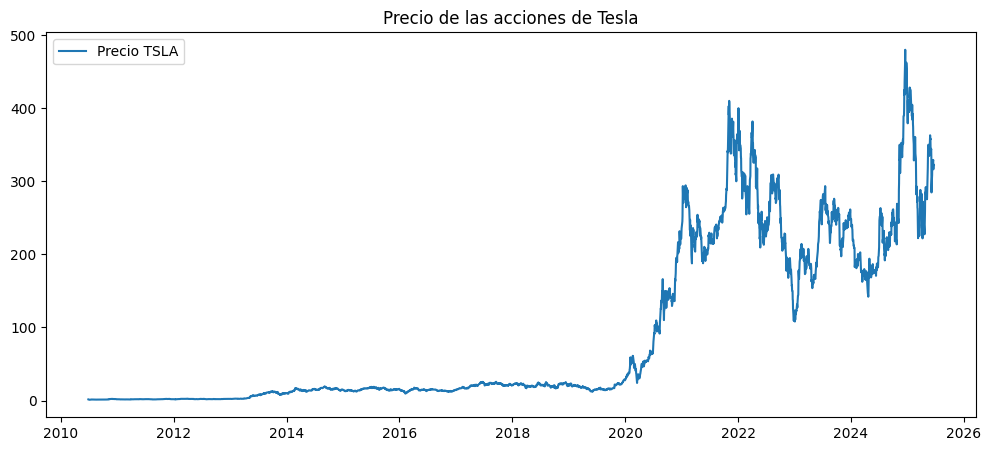

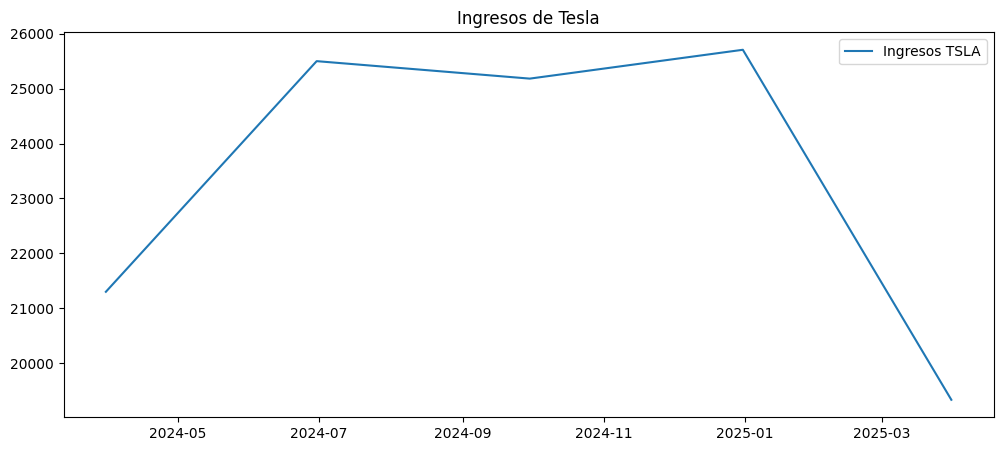

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(tesla_data['Date'], tesla_data['Close'], label='Precio TSLA')
plt.title("Precio de las acciones de Tesla")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(pd.to_datetime(tesla_revenue['Date']), tesla_revenue['Revenue'].astype(float), label='Ingresos TSLA')
plt.title("Ingresos de Tesla")
plt.legend()
plt.show()

## Pregunta 6 - Cuadro de mando de acciones e ingresos de GameStop (2 puntos)

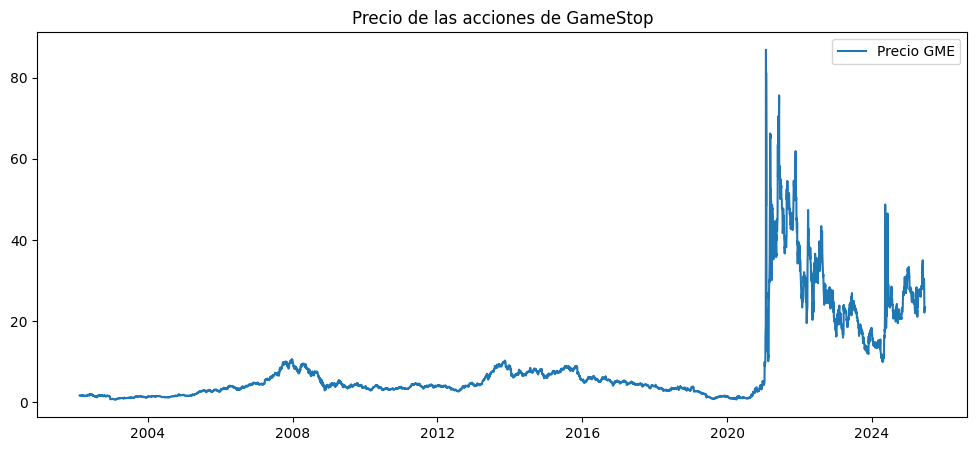

NameError: name 'gme_revenue' is not defined

<Figure size 1200x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(gme_data['Date'], gme_data['Close'], label='Precio GME')
plt.title("Precio de las acciones de GameStop")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(pd.to_datetime(gme_revenue['Date']), gme_revenue['Revenue'].astype(float), label='Ingresos GME')
plt.title("Ingresos de GameStop")
plt.legend()
plt.show()

## Pregunta 7 - Compartir el cuaderno (2 puntos)

Sube tu cuaderno a Google Drive, GitHub o similar, y coloca aquí el enlace compartido:

In [ ]:
# Enlace compartido:
"""https://tu-enlace-compartido-aqui"""